# Fruits classification dataset
The fruits dataset was created by Dr. Iain Murray from University of Edinburgh. He bought a few dozen oranges, lemons and apples of different varieties, and recorded their measurements in a table. And then the professors at University of Michigan formatted the fruits data slightly

In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
fruits = pd.read_csv('fruit_data_with_colors.csv')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Each row of the dataset represents one piece of the fruit as represented by several features that are in the table’s columns.
We have 59 pieces of fruits and 7 features in the dataset:

In [5]:
print(fruits.shape)

(59, 7)


In [6]:
#We have four types of fruits in the dataset:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [10]:
#The data is pretty balanced except mandarin. We will just have to go with it.
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


In [12]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


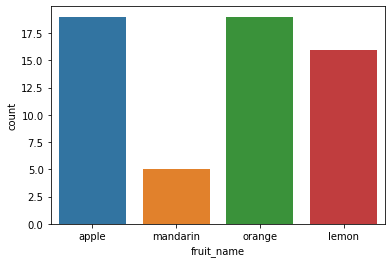

In [8]:
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

#### lets generate hist or dist plot for all the numerical data in fruits

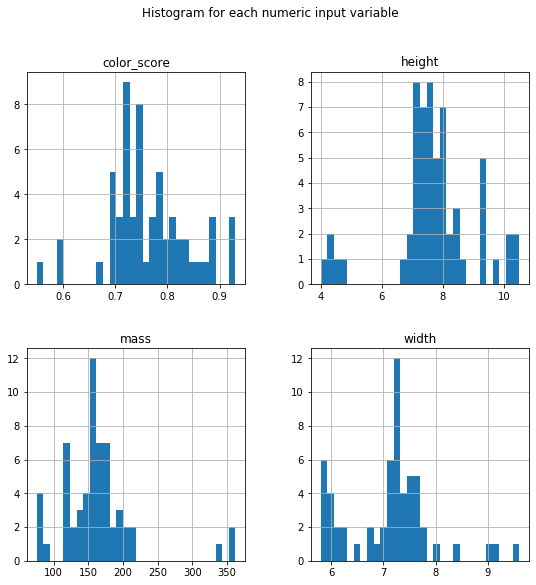

In [38]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

It looks like perhaps color score has a near Gaussian distribution.

In [21]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

In [22]:
#Create Training and Test Sets and Apply Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler # to get all the variables values in normalized wt scale (0-1), ~>1.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[1.02142857, 1.11764706, 0.8       , 0.51351351],
       [0.26428571, 0.38235294, 0.6       , 0.54054054],
       [0.42142857, 0.41176471, 0.96923077, 0.40540541],
       [0.22857143, 0.26470588, 0.47692308, 0.45945946],
       [0.34285714, 0.38235294, 0.55384615, 1.        ],
       [0.35714286, 0.47058824, 0.49230769, 0.13513514],
       [0.23571429, 0.52941176, 0.58461538, 0.54054054],
       [0.5       , 0.44117647, 0.95384615, 0.43243243],
       [0.27857143, 0.38235294, 0.53846154, 0.62162162],
       [0.22857143, 0.44117647, 0.47692308, 0.86486486],
       [0.02857143, 0.05882353, 0.09230769, 0.64864865],
       [0.32142857, 0.32352941, 0.50769231, 1.02702703],
       [0.29285714, 0.38235294, 0.53846154, 0.64864865],
       [0.37142857, 0.52941176, 0.64615385, 0.64864865],
       [0.40714286, 0.5       , 0.63076923, 0.51351351]])

In [23]:
#Build Models
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.70
Accuracy of Logistic regression classifier on test set: 0.40


C:\Users\Harsharaj.raviraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Harsharaj.raviraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [25]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


In [26]:
#Setting max decision tree depth to help avoid overfitting
clf2 = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train) # restirict only till 3 levels
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.89
Accuracy of Decision Tree classifier on test set: 0.73


In [30]:
#Setting max decision tree depth to help avoid overfitting
clf2 = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train) # restirict only till 3 levels
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.93


In [31]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


In [44]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=4)# change no. of tree
rf.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.95
Accuracy of RF classifier on test set: 0.80
